# Inference and Hypothesis testing

#### Class objectives
- Resampling
- Sampling Distribution
- Central Limit Theorem
- Bootstrap


- A/B testing
- $H_{0}$ : Null Hypothesis
- $H_{a}$ : Alternative Hypothesis
- test statistics
- p-value

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [34]:
## Weight of babies at birth

babies_mean = 3.369
babies_std = 1.422
population = 10_000

baby_weight = np.random.normal(babies_mean,babies_std, population)

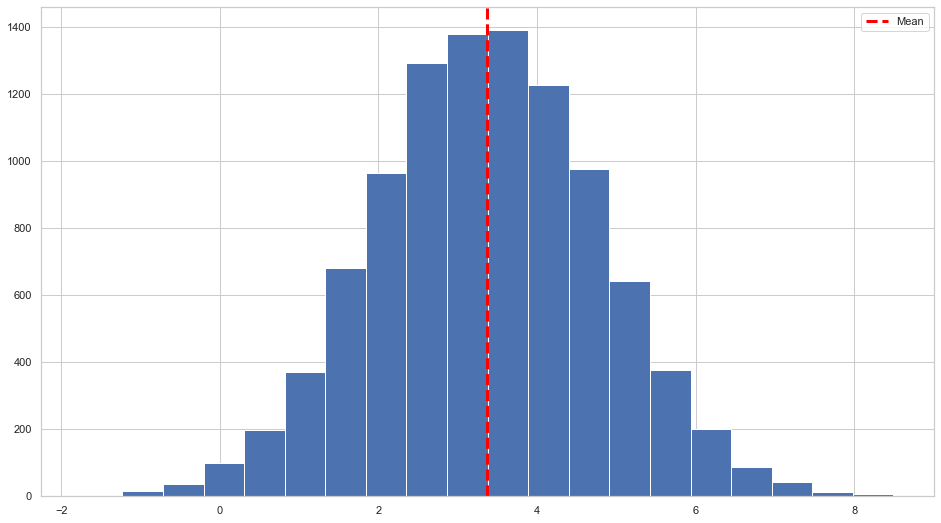

In [61]:
plt.hist(baby_weight, bins=20)
plt.axvline(np.mean(baby_weight), c="red", linewidth=3, linestyle="--", label="Mean")
plt.legend()
plt.show()

In [36]:
sample_size = 30
sample = np.random.choice(baby_weight, sample_size, replace=False)

In [37]:
np.mean(sample), np.std(sample)

(2.7761341671342823, 1.2055406792158943)

####  Sampling Distribution

In [51]:
for i in [1,10,100,1000,10_000]:
    list_of_means = []
    
    for _ in range(i):
        sample_size = 30
        sample = np.random.choice(baby_weight, sample_size, replace=False)
        list_of_means.append(np.mean(sample))
    print(f"Number of samples: {i}")
    print(f"Mean of means: {np.mean(list_of_means)}")
    print(f"Stdv of means: {np.std(list_of_means)}")

Number of samples: 1
Mean of means: 3.1712634021893584
Stdv of means: 0.0
Number of samples: 10
Mean of means: 3.410374627172601
Stdv of means: 0.17999764884146685
Number of samples: 100
Mean of means: 3.377097632522263
Stdv of means: 0.26307871867733273
Number of samples: 1000
Mean of means: 3.358698293609139
Stdv of means: 0.2604290740041101
Number of samples: 10000
Mean of means: 3.3636632173178076
Stdv of means: 0.25958708573576034


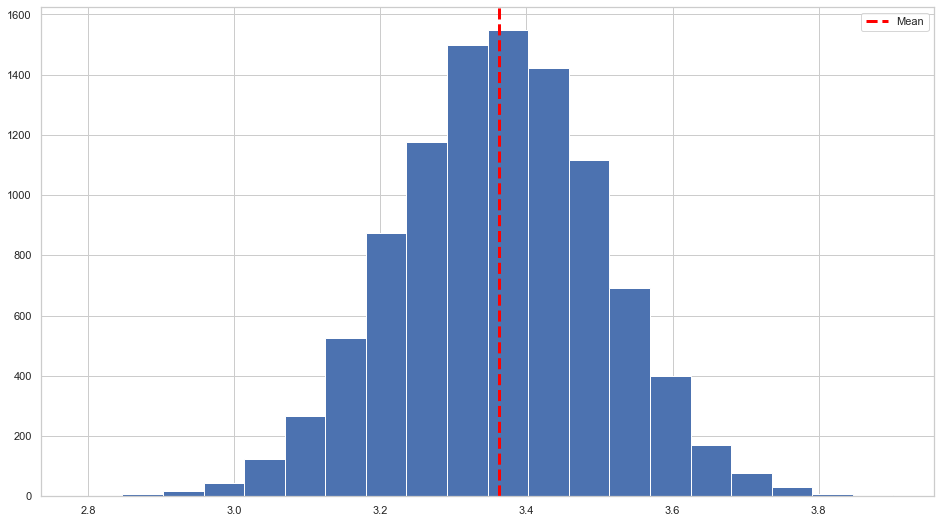

In [62]:
list_of_means = []
for _ in range(10_000):
    sample_size = 100
    sample = np.random.choice(baby_weight, sample_size, replace=False)
    list_of_means.append(np.mean(sample))
plt.hist(list_of_means,bins=20)
plt.axvline(np.mean(list_of_means), c="red", linewidth=3, linestyle="--", label="Mean")
plt.legend()
plt.show();

In [63]:
print(f"Mean of sampling distribution: {np.mean(list_of_means)}")
print(f"Real mean of population: {babies_mean}")
print(f"The Standard Error of sampling distribution: {np.std(list_of_means)}")

Mean of sampling distribution: 3.36227829292749
Real mean of population: 3.369
The Standard Error of sampling distribution: 0.1405980835097633


![](https://render.githubusercontent.com/render/math?math=SE%20%3D%20%5Chat%5Csigma%20%2F%5Csqrt%7Bn%7D&mode=display)

In [67]:
sample_size = 100
sample = np.random.choice(baby_weight, sample_size, replace=False)

In [68]:
std_error = babies_std/(sample_size**.5)
std_error

0.1422

In [70]:
std_error_aprox = np.std(sample)/(sample_size**.5)
std_error_aprox

0.1403010818615738

### Central Limit Theorem
[Statistics Visualizations](https://seeing-theory.brown.edu/)

[Another cool CLT visualization](http://mfviz.com/central-limit/)

In [72]:
dist = np.random.rayleigh(size=10_000)

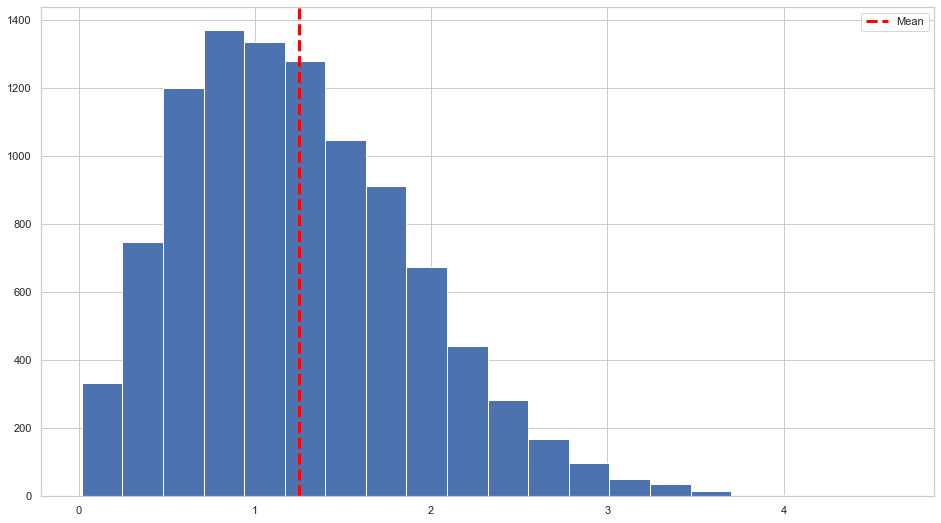

In [73]:
plt.hist(dist,bins=20)
plt.axvline(np.mean(dist), c="red", linewidth=3, linestyle="--", label="Mean")
plt.legend()
plt.show();

In [109]:
# CLT
# dist = np.random.rayleigh(size=10_000)
#dist = np.random.uniform(0.0, 1.0, size=10_000)
dist = np.random.triangular(0,0.8,1,size=10_000)
list_of_means = []
for _ in range(100):
    sample_size = 10
    sample = np.random.choice(dist, sample_size, replace=False)
    list_of_means.append(np.mean(sample))

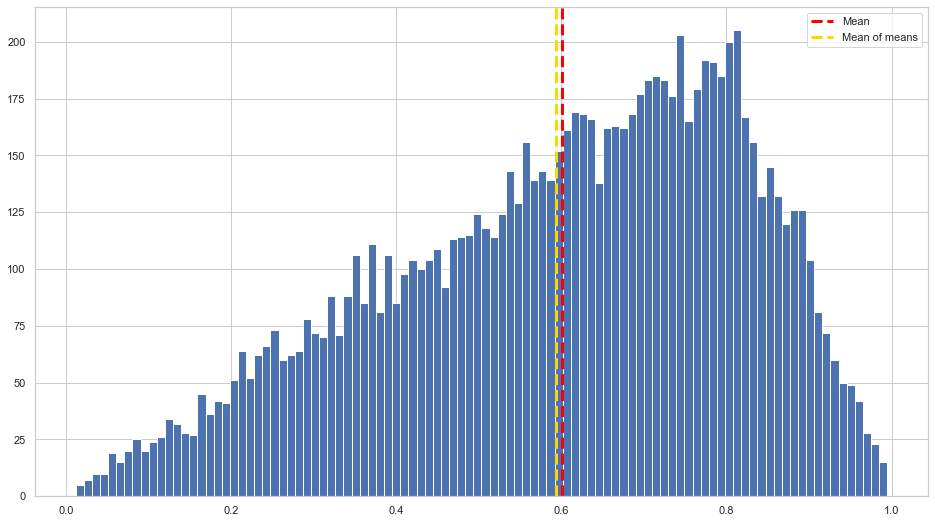

In [110]:
plt.hist(dist,bins=100)
plt.axvline(np.mean(dist), c="red", linewidth=3, linestyle="--", label="Mean")
plt.axvline(np.mean(list_of_means), c="gold", linewidth=3, linestyle="--", label="Mean of means")
plt.legend()
plt.show();

### Bootstrap

#### With Bootstrap we can...
- "Fake" sampling distribution with one single sample

#### Algorithm
- Draw a sample from dataset and replace it.
- Repeat n times, where n is size of original dataset
- Record the mean of the n resampled values
- Repeat steps 1-3 x times.
- Use the x results to:
     - Calculate their standard deviation (estimate sample mean standard error)
     - Produce a histogram (sampling distribution)
     - Find a confidence interval

In [281]:
np.mean(baby_weight)

3.3643906199404707

In [289]:
sample = np.random.choice(baby_weight,size=100,replace=False)
np.mean(sample)

3.6008243096605703

In [283]:
new_sample = []
for _ in range(100):
    new_sample.append(np.random.choice(sample))

In [284]:
np.mean(new_sample)

3.1676413137097614

In [290]:
means_new_samples = []
for _ in range(1000):
    new_sample = np.random.choice(sample,size=100,replace=True)
    means_new_samples.append(np.mean(new_sample))

In [291]:
np.mean(means_new_samples)

3.6037523198524326

In [292]:
# 95% CI
print(f"Bootstrapped estimate of the mean: {np.mean(means_new_samples)}")
ci = np.percentile(means_new_samples, [2.5,97.5])
print(f"Bootstrapped 95% CI of the estimate: {ci}")

Bootstrapped estimate of the mean: 3.6037523198524326
Bootstrapped 95% CI of the estimate: [3.34395332 3.86970105]


In [294]:
sample

array([ 1.871427  ,  3.478504  ,  4.24621596,  2.84913433,  1.54492645,
        2.10118316,  2.88395755,  5.2659563 ,  3.02616155,  3.1459129 ,
        4.04751943,  6.39412492,  2.00546857,  4.16466806,  1.85566488,
        1.66363222,  3.38590479,  4.21915126,  3.12253489,  1.60794296,
        5.64029733,  3.54536749,  4.16667495,  1.83745173,  4.47460152,
        6.14327904,  5.17313074,  3.25912126,  4.44860864,  4.33992267,
        4.21347887,  3.6577159 ,  3.63686824,  2.99706199,  2.85393491,
        6.27629014,  5.2949328 ,  2.17232028,  2.93847518,  5.08839667,
        1.79340191,  2.91692751,  3.21442985,  2.27329479,  2.67650736,
        4.21540783,  3.46953466,  1.84956558,  2.07456389,  3.4008032 ,
        3.97289475,  4.22256812,  2.77192352,  4.10542127,  2.83788357,
        3.60981313,  1.84101738,  3.44877245,  5.61623279,  3.2874588 ,
        3.66439251,  1.97515352,  2.53390391,  1.9527632 ,  7.19059503,
        4.45423638,  1.76584941,  2.82162526,  5.01971157,  2.11

# Hypothesis testing

$Formulate Hypothesis \rightarrow Design Experiment \rightarrow Collect Data \rightarrow Inference/Conclusions$

## A/B testing

- Two groups under two different treatments
- Treatment: Something to which the subject is exposed

- $H_{0}$ : Null Hypothesis ("status quo", chance is to blame)
- $H_{a}$ : Alternative Hypothesis (What you hope to prove)

### Hypothesis : Christmas results on an increase of Coronavirus cases

#### $H_o$ : 
    - Christmas does not affect the number of covid cases

#### $H$ :
    - Christmas affects the number of covid cases
    - Christmas lowers the number of covid cases
    - Christmas increases the number of covid cases
    
    
## Important concepts
    
#### Two-way test (Two-tailed)
    - Hypothesis test that counts the chance results in two directions
#### One-way test (One-tailed)
    - Hypothesis test that counts the chance results in only one direction
    
    
#### CI
    - 90%, 95%, 99%
    - alpha = 1-CI
    
#### Degrees of freedom
    - dof = N - 1
    - N: len(sample)

In [ ]:
# Weekly average covid cases through the year (non Christmas) (Ho)
mu0 = 9500
# Ho : mu = mu0
# Weekly average covid cases in December (H)
# H : mu > mu0
mu = 12000

In [349]:
from scipy.stats import ttest_ind

In [329]:
h0 = np.random.randint(3000,16000, 50)
h = np.random.randint(11000,14000,4)

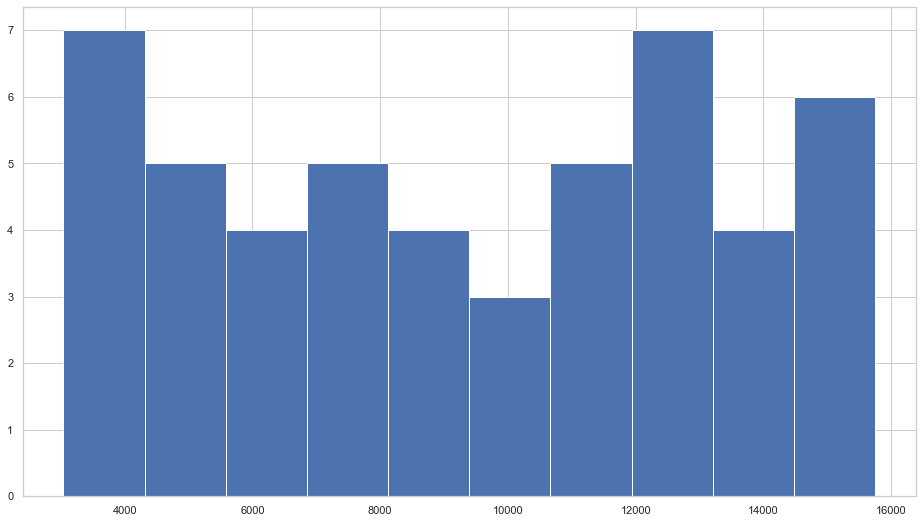

In [330]:
plt.hist(h0);

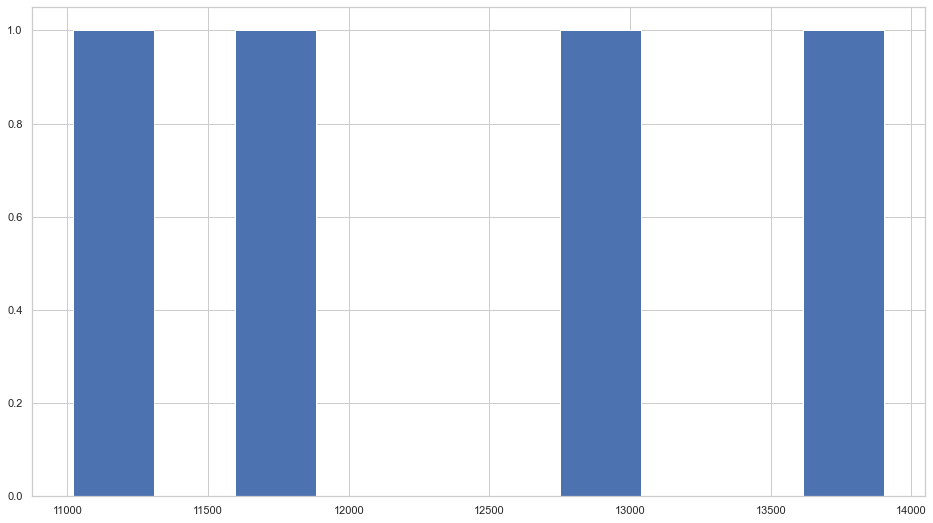

In [331]:
plt.hist(h);

In [332]:
np.mean(h0)

9431.12

In [333]:
np.mean(h)

12387.0

### t-test
#### t-value

Len sample 0: 50
Len sample 1: 4


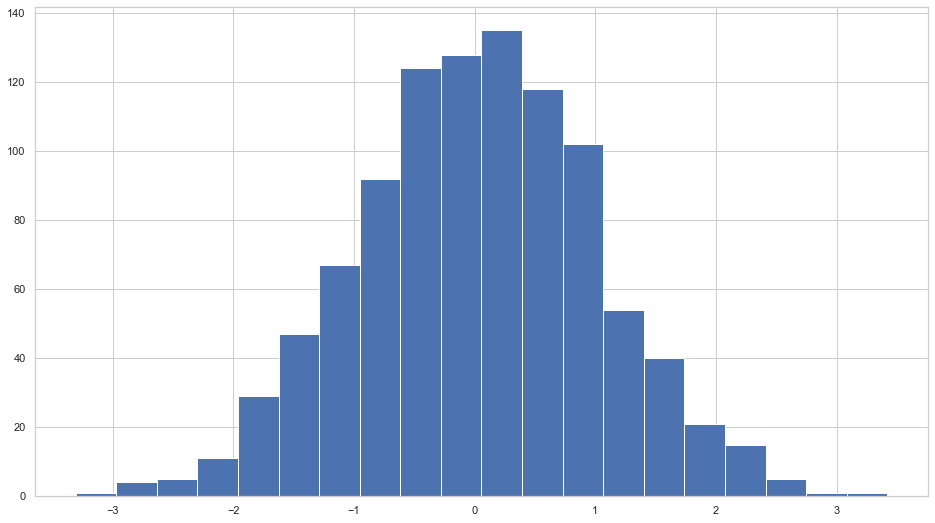

In [351]:
## 95% confidence
print(f"Len sample 0: {len(h0)}")
print(f"Len sample 1: {len(h)}")
### dof = N0 - 1 + N1 - 1
### dof = N0 + N1 - 2 = 52
plt.hist(np.random.standard_t(49,1000),bins=20);

In [350]:
ttest_ind(h0,h)

Ttest_indResult(statistic=-1.4731112319976474, pvalue=0.14674881302522694)

In [356]:
### T-statistic method
# critical value t, FROM TABLE: +- 1.671
# Since our t-statisct calculates is greater than the critical value, we fail reject H0.

### p-value method
# Since our hypothesis is ONE TAILED and scipy.stats.ttest_ind gives thex result for a two tailed 
# we must divide the p-value by 2.

alpha = 0.05
pvalue = ttest_ind(h0,h).pvalue / 2


print(f"p-value = {pvalue}")
print(f"alpha = {alpha}")

if pvalue < alpha:
    print("Null hypothesis may be rejected! -----> Very unlikely that christmas affects covid cases")
else:
    print("Null hypothesis may not be rejected! -----> Christmas likely doesn't affect covid cases")

p-value = 0.07337440651261347
alpha = 0.05
Null hypothesis may not be rejected! -----> Christmas likely doesn't affect covid cases


In [357]:
### Normal test
import pandas as pd
df = pd.read_csv("data/titanic.csv")

In [358]:
x = df.age.dropna()

In [361]:
from scipy.stats import normaltest
#### Were ages on the titanic distributed normally?

# H0: x is normally distributed

# H : x does not come from a normal distribution

alpha = 0.05

pvalue = normaltest(x).pvalue


print(f"p-value = {pvalue}")
print(f"alpha = {alpha}")

if pvalue < alpha:
    print("Null hypothesis may be rejected! -----> Very unlikely that it comes from a normal distribution")
else:
    print("Null hypothesis may not be rejected! -----> It can come from a normal distribution")

p-value = 7.646723472885242e-07
alpha = 0.05
Null hypothesis may be rejected! -----> Very unlikely that it comes from a normal distribution


In [387]:
# Height differs between Zamora, Madrid and Barcelona
# ANOVA
# Ho: Two or more samples have the same means
# H : All samples differ in mean

from scipy.stats import f_oneway

alpha = 0.1

zamora = np.random.normal(174,10,350)
madrid = np.random.normal(174,15,550)
barcelona = np.random.normal(176,12,340)

f_oneway(zamora, madrid, barcelona)

F_onewayResult(statistic=5.771192471942471, pvalue=0.003200547316139318)

In [413]:
### Find out if a dice is fair
from statsmodels.stats.proportion import proportions_ztest

# Ho : Proportion of ocurrences of a number is equal to expected proportion
# H : Proportion is different from expected

die = np.random.randint(1,7,50)

expected_prob = 1/6

#Count the times each number appears
counts = {i:list(die).count(i) for i in range(1,7)}

# Performing thest for each posible outcome 1,2,3,4,5,6
p_values = {}
for i in range(1,7):
    ############# proportions_ztest(counts: successes, nobs: number of trys, value: expected probability)
    p_values[i] = proportions_ztest(counts[i], len(die), expected_prob)[-1]
p_values

{1: 0.07428853323652881,
 2: 0.8061441034244681,
 3: 0.3098899431077221,
 4: 0.5868364613199839,
 5: 0.3098899431077221,
 6: 0.897685145826173}

In [414]:
## Die is fair if all p_values > alpha
alpha = 0.05

reject = False
for pv in  p_values.values():
    if pv < alpha:
        reject= True

if reject:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


### Repeat with die that favors number 6

In [423]:
die = np.random.choice(range(1,7), 100, p=[1/12,1/12,1/12,1/12,1/12,7/12])

expected_prob = 1/6

#Count the times each number appears
counts = {i:list(die).count(i) for i in range(1,7)}

# Performing thest for each posible outcome 1,2,3,4,5,6
p_values = {}
for i in range(1,7):
    ############# proportions_ztest(counts: successes, nobs: number of trys, value: expected probability)
    p_values[i] = proportions_ztest(counts[i], len(die), expected_prob)[-1]
p_values

{1: 0.6406715769752815,
 2: 0.02626829138204228,
 3: 0.00015145875656067745,
 4: 0.0014003654607733641,
 5: 7.073096934759048e-06,
 6: 6.852013872706067e-14}

![](https://miro.medium.com/max/1000/1*NILL_3EnEckFsQ6Hy06EHg.png)

### Further Resources
[Funny video on Correlation and Causation](https://www.youtube.com/watch?v=8B271L3NtAw)